In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 5.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 5.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 5.0 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.7 MB 5.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 5.4 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 5.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 5.4 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- --------------------

In [4]:
!pip install gower

In [3]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 6.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.9 MB 6.1 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.9 MB 6.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 6.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.7/9.9 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 6.9 MB/s  0:00:01


In [4]:
df = pd.read_csv('C:/Users/osegh/Desktop/UVA/ML 1 Intro to Predictive Modeling/ML-Healthdata-project/joining_data/CDC-2019-2021-2023-DATA.csv')

df.head()

C:\Users\osegh\AppData\Local\Temp\ipykernel_6468\3606275901.py:1: DtypeWarning: Columns (1,4,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/osegh/Desktop/UVA/ML 1 Intro to Predictive Modeling/ML-Healthdata-project/joining_data/CDC-2019-2021-2023-DATA.csv')


,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,No,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,No,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
2,2,NaN,30.0,0.0,No,No,No,No,No,No,No,No,NaN,Never,Never,Never,Never,Never,2019
3,3,NaN,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,4,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019


- MENTHLTH : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for
how many days during the past 30 days was your mental health not good? 


- ADDEPEV3 : (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor
depression)? 

In [5]:
df.columns.unique()

Index(['Unnamed: 0', 'BIRTHSEX', 'MENTHLTH', 'POORHLTH', 'ADDEPEV3', 'DECIDE',
       'DIFFALON', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC',
       'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX',
       'IYEAR'],
      dtype='object')

In [31]:
ace_YN = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC']
ace_NOM = ['ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']
cat_cols = ace_YN + ace_NOM

In [7]:
mental_health_cols = ['MENTHLTH', 'POORHLTH', 'ADDEPEV3', 'DECIDE', 'DIFFALON']

In [8]:
df_clean = df.dropna(subset=cat_cols)

In [9]:
from gower import gower_matrix


decided to use gower python libary because the inital code I had was just counting mismatches, not properly handling ordinal variables like Never/Once/More than once.

In [10]:
df_sample = df_clean.sample(n=3000, random_state=42)

distance_matrix = gower_matrix(df_sample[cat_cols])
print("Distance matrix shape:", distance_matrix.shape)
print("Distance matrix type:", type(distance_matrix))

Distance matrix shape: (3000, 3000)
Distance matrix type: <class 'numpy.ndarray'>


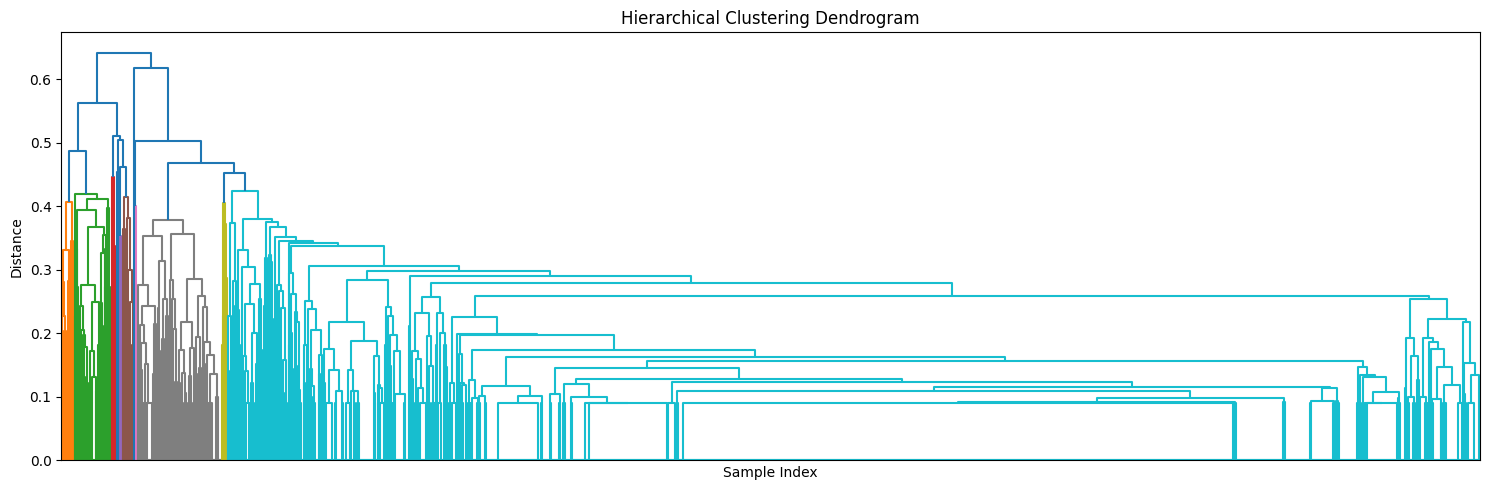

In [27]:
Z = linkage(squareform(distance_matrix, checks=False), method='average')

plt.figure(figsize=(15, 5))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [11]:
sil_results = []

for k in range(2, 5):
    model = AgglomerativeClustering(
    n_clusters=k,
    metric="precomputed",
    linkage='average' 
    )
    labels_k = model.fit_predict(distance_matrix)

    sil = silhouette_score(distance_matrix, labels_k, metric="precomputed")
    
    sil_results.append({"k": k, "silhouette": sil})

sil_df = pd.DataFrame(sil_results)
print("\nSilhouette scores:\n", sil_df)

best_k = sil_df.loc[sil_df["silhouette"].idxmax(), "k"]
print("Best K by silhouette (Gower):", int(best_k))


Silhouette scores:
    k  silhouette
0  2    0.626469
1  3    0.589551
2  4    0.581141
Best K by silhouette (Gower): 2


In [12]:
px.line(
    sil_df,
    x="k",
    y="silhouette", 
    markers=True,
    title="Silhouette Scores for Different K (Gower Distance)"
)

In [13]:
final_model = AgglomerativeClustering(
n_clusters=best_k,
metric="precomputed",
linkage='average'
)
final_labels = final_model.fit_predict(distance_matrix)

In [14]:
df_sample["cluster"] = final_labels
print(f"\nFinal Clustering Results (k={best_k}):")
print(df_sample["cluster"].value_counts().sort_index())


Final Clustering Results (k=2):
cluster
0    2846
1     154
Name: count, dtype: int64


- Cluster 0 (majority group): "Low Risk" / "Low ACEs" Group
- Cluster 1 (smaller group): "High Risk" / "High ACEs" Group

In [35]:
for col in cat_cols:
        print(pd.crosstab(df_sample["cluster"], df_sample[col], normalize='index'))

ACEDEPRS        No       Yes
cluster                     
0         0.855587  0.144413
1         0.298701  0.701299
ACEDRINK        No       Yes
cluster                     
0         0.787772  0.212228
1         0.331169  0.668831
ACEDRUGS        No       Yes
cluster                     
0         0.929726  0.070274
1         0.519481  0.480519
ACEPRISN        No       Yes
cluster                     
0         0.945889  0.054111
1         0.655844  0.344156
ACEDIVRC        No  Parents not married       Yes
cluster                                          
0         0.764582             0.013703  0.221715
1         0.376623             0.038961  0.584416
ACEPUNCH  More than once     Never      Once
cluster                                     
0               0.098032  0.861209  0.040759
1               0.467532  0.454545  0.077922
ACEHURT1  More than once     Never      Once
cluster                                     
0               0.135278  0.799368  0.065355
1               0.616

ACEDEPRS: Did you live with anyone who was depressed, mentally ill, or suicidal? 


ACEDRINK: Did you live with anyone who was a problem drinker or alcoholic? 


ACEDRUGS: Did you live with anyone who used illegal street drugs or who abused prescription medications? 


ACEPRISN: Did you live with anyone who served time or was sentenced to serve time in a prison, jail, or other correctional facility? 


ACEDIVRC: Were your parents separated or divorced? 


ACEPUNCH: How often did your parents or adults in your home ever slap, hit, kick, punch or beat each other up? 


ACEHURT1: Not including spanking, (before age 18), how often did a parent or adult in your home ever hit, beat, kick, or physically hurt you in any way? 


ACESWEAR: How often did a parent or adult in your home ever swear at you, insult you, or put you down? 


ACETOUCH: How often did anyone at least 5 years older than you or an adult, ever touch you sexually? 


ACETTHEM: How often did anyone at least 5 years older than you or an adult, try to make you touch them sexually? 


ACEHVSEX: How often did anyone at least 5 years older than you or an adult, force you to have sex?

Plotly heatmap for dashboard

In [ ]:
heatmap_matrix = []
heatmap_labels = []

# Data Processing Loop
for col in cat_cols:
    if col in df_sample.columns:
        crosstab = pd.crosstab(df_sample["cluster"], df_sample[col], normalize='index')
        for category in crosstab.columns:
            heatmap_matrix.append([
                crosstab.loc[0, category] * 100,  # Cluster 0
                crosstab.loc[1, category] * 100   # Cluster 1
            ])
            heatmap_labels.append(f"<b>{col}</b><br>{category}")

heatmap_matrix = np.array(heatmap_matrix)

custom_colors = [
    [0.0, "#d1eeff"],  # Very Light Blue
    [0.33, "#6b8cce"], # Blue/Indigo
    [0.66, "#9b59b6"], # Purple/Violet
    [1.0, "#ff69b4"]   # Hot Pink
]

row_height = 35
dynamic_height = max(600, len(heatmap_labels) * row_height)

fig2 = go.Figure(data=go.Heatmap(
    z=heatmap_matrix,
    y=heatmap_labels,
    x=['Cluster 0 (Low ACEs)', 'Cluster 1 (High ACEs)'],
    colorscale=custom_colors, 
    text=np.round(heatmap_matrix, 1),
    texttemplate='%{text}%',
    textfont={"size": 11}, 
    colorbar=dict(title="Percentage (%)"),
    xgap=2, 
    ygap=2  
))

fig2.update_layout(
    title='All ACE Variables: Proportion Heatmap by Cluster',
    xaxis_title='Cluster',
    yaxis_title='Variable & Category',
    height=dynamic_height, 
    yaxis=dict(
        dtick=1,
        automargin=True 
    )
)

fig2.show()

In [ ]:
color_c0 = '#6b8cce' 
color_c1 = '#ff69b4' 

fig3 = go.Figure()

buttons = []

for i, col in enumerate(cat_cols):
    crosstab = pd.crosstab(df_sample["cluster"], df_sample[col], normalize='index') * 100
    categories = crosstab.columns.tolist()
    
    is_visible = (i == 0)

    # Bar for Cluster 0
    fig3.add_trace(
        go.Bar(
            x=categories, 
            y=crosstab.loc[0], 
            name='Cluster 0 (Low ACEs)',
            marker_color=color_c0,
            visible=is_visible 
        )
    )

    # Bar for Cluster 1
    fig3.add_trace(
        go.Bar(
            x=categories, 
            y=crosstab.loc[1], 
            name='Cluster 1 (High ACEs)',
            marker_color=color_c1,
            visible=is_visible
        )
    )

    # Dropdown 
    visible_settings = [False] * (len(cat_cols) * 2)
    
    visible_settings[2*i] = True     
    visible_settings[2*i + 1] = True

    buttons.append(dict(
        label=col,
        method="update",
        args=[
            {"visible": visible_settings}, 
            {"title": f"Comparison: {col} by Cluster"} 
        ]
    ))

fig3.update_layout(
    title=f"Comparison: {cat_cols[0]} by Cluster",
    yaxis_title="Percentage (%)",
    xaxis_title="Category",
    barmode='group',
    height=600, 
    margin=dict(r=200), 
    
    legend=dict(
        x=1.05,        
        y=1.0,        
        xanchor='left',
        yanchor='top'
    ),
    
    # Dropdown under the Legend
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.05,      
            xanchor="left",
            y=0.85,     
            yanchor="top"
        )
    ]
)

fig3.show()

In [ ]:
df_sample['ADDEPEV3'] = df_sample['ADDEPEV3'].replace({
    0.0: 'No', 
    1.0: 'Yes', 
    0: 'No', 
    1: 'Yes'
})

# List of categorical columns
cat_mh_cols = ['ADDEPEV3', 'DECIDE', 'DIFFALON']

for col in cat_mh_cols:
    print(pd.crosstab(df_sample['cluster'], df_sample[col], normalize='index').round(2))

ADDEPEV3    No   Yes
cluster             
0         0.82  0.18
1         0.46  0.54
DECIDE     No   Yes
cluster            
0        0.90  0.10
1        0.66  0.34
DIFFALON    No   Yes
cluster             
0         0.93  0.07
1         0.81  0.19


ADDEPEV3: (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)? 


DECIDE: Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions? 


DIFFALON: Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor's office or shopping?

In [ ]:

# List of columns
cat_mh_cols = ['ADDEPEV3', 'DECIDE', 'DIFFALON']
titles = ["Depressive Disorder", "Difficulty Deciding", "Difficulty Errands Alone"]

fig6 = make_subplots(
    rows=3, cols=1,
    subplot_titles=titles,
    vertical_spacing=0.1, 
    shared_xaxes=False 
)

c0_color = '#6b8cce'
c1_color = '#ff69b4'

for i, col in enumerate(cat_mh_cols):
    ct = pd.crosstab(df_sample['cluster'], df_sample[col], normalize='index') * 100
    labels = ct.columns.astype(str)

    # Cluster 0
    fig6.add_trace(go.Bar(
        x=labels, y=ct.loc[0],
        name='Cluster 0 (Low ACEs)',
        marker_color=c0_color,
        showlegend=(i==0) # Only show legend on the top graph
    ), row=i+1, col=1) 

    # Cluster 1
    fig6.add_trace(go.Bar(
        x=labels, y=ct.loc[1],
        name='Cluster 1 (High ACEs)',
        marker_color=c1_color,
        showlegend=(i==0)
    ), row=i+1, col=1)

fig6.update_layout(
    title='Mental Health & Functional Difficulty: Cluster Comparison',
    barmode='group',
    height=800,
)

fig6.update_yaxes(title_text="Percentage (%)", row=1, col=1)
fig6.update_yaxes(title_text="Percentage (%)", row=2, col=1)
fig6.update_yaxes(title_text="Percentage (%)", row=3, col=1)

fig6.show()

In [ ]:
# List of numerical columns
num_mh_cols = ['MENTHLTH', 'POORHLTH']
print("Average Days of Poor Health by Cluster")
print(df_sample.groupby('cluster')[num_mh_cols].mean())

print(df_sample.groupby('cluster')['MENTHLTH'].describe())


Average Days of Poor Health by Cluster
          MENTHLTH  POORHLTH
cluster                     
0         3.619048  5.138312
1        11.486667  8.488189
          count       mean        std  min  25%  50%    75%   max
cluster                                                          
0        2793.0   3.619048   7.672623  0.0  0.0  0.0   3.00  30.0
1         150.0  11.486667  12.223169  0.0  0.0  5.0  27.25  30.0


MENTHLTH: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 


POORHLTH: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?

In [ ]:
fig_violin = go.Figure()

# Define variables
metrics = ['MENTHLTH', 'POORHLTH']
x_labels = ['Mental Health', 'Physical Health'] 

for i, col in enumerate(metrics):
    show_legend = (i == 0)

    # Cluster 0 (Left Side / Blue) 
    fig_violin.add_trace(go.Violin(
        y=df_sample[df_sample['cluster'] == 0][col],
        x=[x_labels[i]] * len(df_sample[df_sample['cluster'] == 0]),
        legendgroup='Cluster 0', 
        scalegroup='Cluster 0', 
        name='Cluster 0 (Low ACEs)',
        side='negative',
        line_color='#6b8cce',
        fillcolor='#6b8cce',
        opacity=0.6,
        meanline_visible=True,
        showlegend=show_legend 
    ))

    # Cluster 1 (Right Side / Pink) 
    fig_violin.add_trace(go.Violin(
        y=df_sample[df_sample['cluster'] == 1][col],
        x=[x_labels[i]] * len(df_sample[df_sample['cluster'] == 1]), 
        legendgroup='Cluster 1', 
        scalegroup='Cluster 1', 
        name='Cluster 1 (High ACEs)',
        side='positive',
        line_color='#ff69b4',
        fillcolor='#ff69b4',
        opacity=0.6,
        meanline_visible=True,
        showlegend=show_legend
    ))

fig_violin.update_traces(width=0.8, points=False) 

fig_violin.update_layout(
    title='Distribution of Unhealthy Days (Split Violin)',
    yaxis_title='Days (0-30)',
    xaxis_title='Health Metric',
    violingap=0, 
    violingroupgap=0,
    violinmode='overlay',
    height=600,
    legend=dict(title="Cluster Group")
)

fig_violin.show()

## Summary


For my analysis, I used Hierarchical Clustering to see if distinct groups emerged based on the respondents' Adverse Childhood Experiences (ACEs). I found two clear clusters: a large "Low Risk" group (Cluster 0) and a smaller "High Risk" group (Cluster 1). The difference between them is pretty stark people in the High Risk cluster were way more likely to face household challenges, like living with someone who abused alcohol (67% vs. 21% in the Low Risk group) or served time in prison (34% vs. 5%). They also reported much higher frequencies of verbal and physical abuse, whereas those experiences were really low in the Low Risk group.

The data shows a really strong link between these childhood experiences and health struggles later in life. The High Risk group had significantly worse mental health outcomes; for example, 54% had been diagnosed with a depressive disorder, compared to just 18% in the Low Risk group. They also reported struggling more with daily functioning, like having difficulty making decisions. When looking at the last 30 days, the High Risk group averaged about 11.5 days of poor mental health that’s more than triple the 3.6 days reported by the Low Risk group. Even their physical health was worse, averaging about 8.5 bad days compared to just 5.1 for the other group.